In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from uoineuro.utils import (calculate_selection_ratio,
                            plot_difference_distribution,
                            tighten_scatter_plot)
from uoineuro.coupling_utils import check_metrics
%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'],
                         'fits/uoineuro/coupling')

In [3]:
# consolidate A1 results
ac_results_path = os.path.join(base_path, 'ecog/ecog_coupling.h5')
ac_results = h5py.File(ac_results_path, 'r')
# extract coupling coefficients
ac_baseline_ccs = np.median(ac_results['lasso/coupling_coefs'], axis=0)
ac_uoi_ccs = np.median(ac_results['uoi_lasso_bic/coupling_coefs'], axis=0)

In [4]:
# consolidate V1 results
v1_results_paths = [os.path.join(base_path, 'pvc11/pvc11_monkey1_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey2_coupling.h5'),
                    os.path.join(base_path, 'pvc11/pvc11_monkey3_coupling.h5')]
n_v1_fits = len(v1_results_paths)
v1_results = [h5py.File(v1_results_path, 'r')
              for v1_results_path in v1_results_paths]
# extract coupling coefficients
v1_baseline_ccs = [np.median(v1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for v1_result in v1_results]
v1_uoi_ccs = [np.median(v1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for v1_result in v1_results]

In [5]:
# consolidate M1 results
m1_results_paths = [os.path.join(base_path, 'nhp/nhp_indy_20160407_02_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_01_coupling.h5'),
                    os.path.join(base_path, 'nhp/nhp_indy_20160411_02_coupling.h5')]
n_m1_fits = len(m1_results_paths)
m1_results = [h5py.File(m1_results_path, 'r')
              for m1_results_path in m1_results_paths]
# extract coupling coefficients
m1_baseline_ccs = [np.median(m1_result['glmnet_poisson/coupling_coefs'], axis=0)
                for m1_result in m1_results]
m1_uoi_ccs = [np.median(m1_result['uoi_poisson_bic/coupling_coefs'], axis=0)
              for m1_result in m1_results]

In [6]:
colors = ['#4986ae', '#ff800e', '#78b26d']

# Metric Summary

In [7]:
ac_labels = [r'\textbf{DB 1}']
vc_labels = [r'\textbf{KS 1}', r'\textbf{KS 2}', r'\textbf{KS 3}']
mc_labels = [r'\textbf{OCMS 1}', r'\textbf{OCMS 2}', r'\textbf{OCMS 3}']

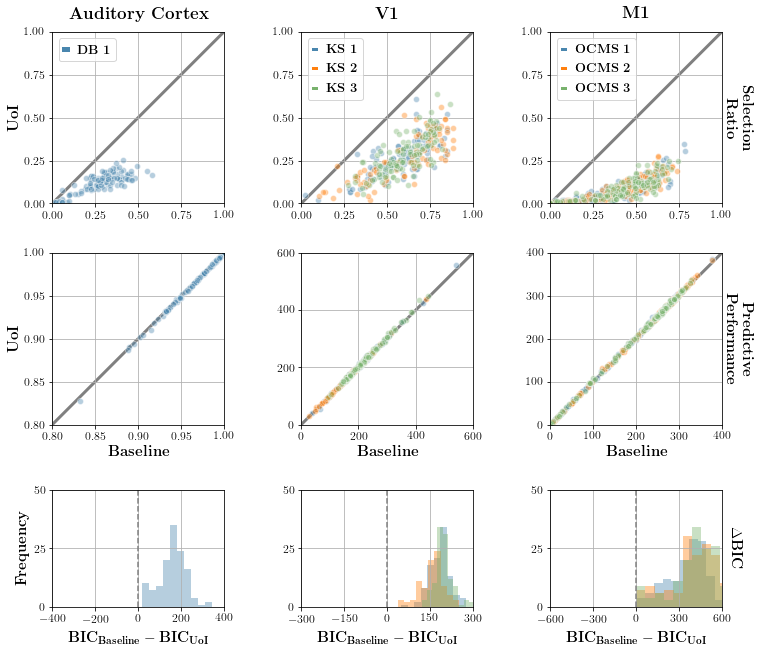

In [8]:
fig, axes = plt.subplots(4, 3,
                         figsize=(12, 10.8),
                         gridspec_kw={'height_ratios': [1, 1, 0.01, 0.6]})

# calculate and plot selection ratios for all brain regions
axes[0, 0].scatter(
    calculate_selection_ratio(ac_baseline_ccs),
    calculate_selection_ratio(ac_uoi_ccs),
    alpha=0.40,
    color=colors[0],
    edgecolor='w')

[axes[0, 1].scatter(
    calculate_selection_ratio(v1_baseline_ccs[idx]),
    calculate_selection_ratio(v1_uoi_ccs[idx]),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_v1_fits)]

[axes[0, 2].scatter(
    calculate_selection_ratio(m1_baseline_ccs[idx]),
    calculate_selection_ratio(m1_uoi_ccs[idx]),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_m1_fits)]

# set limits and ticks for selection ratios
for ax in axes[0]:
    tighten_scatter_plot(ax, bounds=[0, 1],
                         line_kwargs={'color': 'gray', 'linewidth': 3})
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    
# plot predictive performance comparison, auditory cortex
axes[1, 0].scatter(
    np.median(ac_results['lasso/r2s_test'], axis=0),
    np.median(ac_results['uoi_lasso_bic/r2s_test'], axis=0),
    alpha=0.40,
    color=colors[0],
    edgecolor='w')
# set limits and ticks for AC
tighten_scatter_plot(axes[1, 0], bounds=[0.80, 1.],
                     line_kwargs={'color': 'gray', 'linewidth': 3})
axes[1, 0].set_xticks([0.8, 0.85, 0.9, 0.95, 1])
axes[1, 0].set_yticks([0.8, 0.85, 0.9, 0.95, 1])

# plot predictive performance comparison, V1
[axes[1, 1].scatter(
    np.median(v1_results[idx]['glmnet_poisson/deviances_test'], axis=0),
    np.median(v1_results[idx]['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_v1_fits)]
# set limits and ticks for V1
tighten_scatter_plot(axes[1, 1], bounds=[0, 600.],
                     line_kwargs={'color': 'gray', 'linewidth': 3})
axes[1, 1].set_xticks([0, 200, 400, 600])
axes[1, 1].set_yticks([0, 200, 400, 600])

# plot predictive performance comparison, M1
[axes[1, 2].scatter(
    np.median(m1_results[idx]['glmnet_poisson/deviances_test'], axis=0),
    np.median(m1_results[idx]['uoi_poisson_bic/deviances_test'], axis=0),
    alpha=0.40,
    color=colors[idx],
    edgecolor='w') for idx in range(n_m1_fits)]
# set limits and ticks for M1
tighten_scatter_plot(axes[1, 2], bounds=[0, 400.],
                     line_kwargs={'color': 'gray', 'linewidth': 3})
axes[1, 2].set_xticks([0, 100, 200, 300, 400])
axes[1, 2].set_yticks([0, 100, 200, 300, 400])

for ax in axes[:2].ravel():
    ax.grid('on')
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=12)
    
# plot difference in BICs for each brain region
plot_difference_distribution(ac_results['lasso'],
                             [ac_results['uoi_lasso_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[3, 0]]])),
                             color=colors[0],
                             alpha=0.4)

[plot_difference_distribution(v1_results[idx]['glmnet_poisson'],
                             [v1_results[idx]['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[3, 1]]])),
                             color=colors[idx],
                             alpha=0.4) for idx in range(n_v1_fits)]

[plot_difference_distribution(m1_results[idx]['glmnet_poisson'],
                             [m1_results[idx]['uoi_poisson_bic']],
                             metrics=['bics'],
                             fax=(fig, np.array([[axes[3, 2]]])),
                             color=colors[idx],
                             alpha=0.4) for idx in range(n_m1_fits)]
# set bounds for histograms
axes[3, 0].set_xlim([-400, 400])
axes[3, 0].set_xticks([-400, -200, 0, 200, 400])
axes[3, 1].set_xlim([-300, 300])
axes[3, 1].set_xticks([-300, -150, 0, 150, 300])
axes[3, 2].set_xlim([-600, 600])
axes[3, 2].set_xticks([-600, -300, 0, 300, 600])

for ax in axes[3]:
    ax.axvline(0, linestyle='--', color='gray')
    ax.set_xlabel(r'$\textbf{BIC}_{\normalsize\textbf{Baseline}} - \textbf{BIC}_{\normalsize\textbf{UoI}}$',
                  fontsize=15,
                  labelpad=10)
    ax.set_ylim([0, 50])
    ax.set_yticks([0, 25, 50])
    ax.grid('on')
    ax.tick_params(labelsize=12)

# labels
axes[0, 0].set_title(r'\textbf{Auditory Cortex}', fontsize=17, pad=13)
axes[0, 1].set_title(r'\textbf{V1}', fontsize=17, pad=13)
axes[0, 2].set_title(r'\textbf{M1}', fontsize=17, pad=13)

# metric labels
axes[0, -1].set_ylabel(
    r'\textbf{Selection}' '\n' r'\textbf{Ratio}',
    fontsize=15,
    labelpad=30,
    rotation=270)
axes[1, -1].set_ylabel(
    r'\textbf{Predictive}' '\n' r'\textbf{Performance}',
    fontsize=15,
    labelpad=30,
    rotation=270)
axes[3, -1].set_ylabel(
    r'$\Delta$\textbf{BIC}',
    fontsize=15,
    labelpad=20,
    rotation=270)
axes[0, -1].yaxis.set_label_position('right')
axes[1, -1].yaxis.set_label_position('right')
axes[3, -1].yaxis.set_label_position('right')

fig_invert = fig.transFigure.inverted()
middle_x, _ = fig_invert.transform(axes[-1, 1].transAxes.transform([0.5, 0.]))
_, middle_y = fig_invert.transform(axes[1, 1].transAxes.transform([0., 0.5]))

for ax in axes[2]:
    ax.axis('off')

axes[0, 0].set_ylabel(r'\textbf{UoI}', fontsize=15)
axes[1, 0].set_ylabel(r'\textbf{UoI}', fontsize=15)
axes[3, 0].set_ylabel(r'\textbf{Frequency}', fontsize=15)
for ax in axes[1]:
    ax.set_xlabel(r'\textbf{Baseline}', fontsize=15)

    
axes[0, 0].plot(
    [], [],
    color=colors[0],
    linewidth=5,
    label=ac_labels[0])
axes[0, 0].legend(loc=2, prop={'size': 13}, handlelength=0.2)

for color, label1, label2 in zip(colors, vc_labels, mc_labels):
    axes[0, 1].plot([], [],
                    linewidth=3,
                    color=color,
                    label=label1)
    axes[0, 2].plot([], [],
                    linewidth=3,
                    color=color,
                    label=label2)
    
axes[0, 1].legend(loc=2, prop={'size': 13}, handlelength=0.2)
axes[0, 2].legend(loc=2, prop={'size': 13}, handlelength=0.2)

plt.subplots_adjust(hspace=0.20,
                    wspace=0.45)

# plt.savefig('figure4a.pdf', bbox_inches='tight')

# Distribution of Coefficients: Histograms

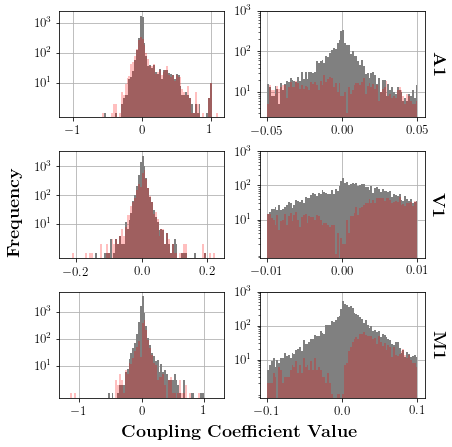

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(6, 6))

ac_baseline_nz_ccs = ac_baseline_ccs.ravel()
ac_baseline_nz_ccs = ac_baseline_nz_ccs[ac_baseline_nz_ccs != 0]
ac_uoi_nz_ccs = ac_uoi_ccs.ravel()
ac_uoi_nz_ccs = ac_uoi_nz_ccs[ac_uoi_nz_ccs != 0]

# auditory cortex
bins_a1 = np.linspace(-1.1, 1.1, 81)
axes[0, 0].hist(ac_baseline_nz_ccs,
             color='gray',
             bins=bins_a1)
axes[0, 0].hist(ac_uoi_nz_ccs,
             color='red',
             bins=bins_a1,
             alpha=0.25)
axes[0, 0].set_yscale('log', nonposy='clip')
axes[0, 0].set_xlim([-1.2, 1.2])

bins_a1 = np.linspace(-0.05, 0.05, 81)
axes[0, 1].hist(ac_baseline_nz_ccs,
             color='gray',
             bins=bins_a1)
axes[0, 1].hist(ac_uoi_nz_ccs,
             color='red',
             bins=bins_a1,
             alpha=0.25)
axes[0, 1].set_yscale('log', nonposy='clip')

# visual cortex
v1_baseline_nz_ccs = v1_baseline_ccs[0].ravel()
v1_baseline_nz_ccs = v1_baseline_nz_ccs[v1_baseline_nz_ccs != 0]
v1_uoi_nz_ccs = v1_uoi_ccs[0].ravel()
v1_uoi_nz_ccs = v1_uoi_nz_ccs[v1_uoi_nz_ccs != 0]

bins_v1 = np.linspace(-0.23, 0.23, 81)
axes[1, 0].hist(v1_baseline_nz_ccs,
             color='gray',
             bins=bins_v1)
axes[1, 0].hist(v1_uoi_nz_ccs,
             color='red',
             bins=bins_v1,
             alpha=0.25)
axes[1, 0].set_yscale('log', nonposy='clip')

bins_v1 = np.linspace(-0.01, 0.01, 81)
axes[1, 1].hist(v1_baseline_nz_ccs,
             color='gray',
             bins=bins_v1)
axes[1, 1].hist(v1_uoi_nz_ccs,
             color='red',
             bins=bins_v1,
             alpha=0.25)
axes[1, 1].set_yscale('log', nonposy='clip')

# motor cortex
m1_baseline_nz_ccs = m1_baseline_ccs[0].ravel()
m1_baseline_nz_ccs = m1_baseline_nz_ccs[m1_baseline_nz_ccs != 0]
m1_uoi_nz_ccs = m1_uoi_ccs[0].ravel()
m1_uoi_nz_ccs = m1_uoi_nz_ccs[m1_uoi_nz_ccs != 0]

bins_m1 = np.linspace(-1.2, 1.2, 81)
axes[2, 0].hist(m1_baseline_nz_ccs,
             color='gray',
             bins=bins_m1)
axes[2, 0].hist(m1_uoi_nz_ccs,
             color='red',
             bins=bins_m1,
             alpha=0.25)
axes[2, 0].set_yscale('log', nonposy='clip')

bins_m1 = np.linspace(-0.1, 0.1, 81)
axes[2, 1].hist(m1_baseline_nz_ccs,
             color='gray',
             bins=bins_m1)
axes[2, 1].hist(m1_uoi_nz_ccs,
             color='red',
             bins=bins_m1,
             alpha=0.25)
axes[2, 1].set_yscale('log', nonposy='clip')

for ax in axes.ravel():
    ax.set_yticks([10, 100, 1000])
    ax.tick_params(labelsize=13)
    ax.grid('on')
    ax.yaxis.set_label_position('right')

# metric labels
axes[0, 1].set_ylabel(
    r'\textbf{A1}',
    fontsize=18,
    labelpad=20,
    rotation=270)
axes[1, 1].set_ylabel(
    r'\textbf{V1}',
    fontsize=18,
    labelpad=20,
    rotation=270)
axes[2, 1].set_ylabel(
    r'\textbf{M1}',
    fontsize=18,
    labelpad=20,
    rotation=270)

for ax in axes.ravel():
    ax.set_axisbelow(True)

fig.text(
    x=-0.02, y=0.5,
    s=r'\textbf{Frequency}',
    fontsize=18,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=0.5, y=-0.01,
    s=r'\textbf{Coupling Coefficient Value}',
    fontsize=18,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
# plt.savefig('coupling_coef_histogram.pdf', bbox_inches='tight')

# Distribution of Coefficients: Scatter Plots

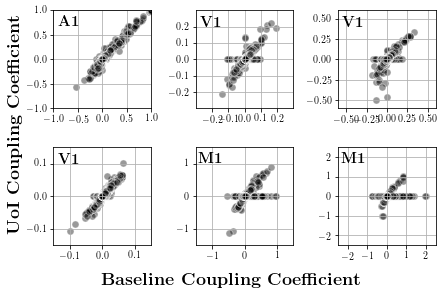

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
ax_list = axes.ravel()

baseline_coefs = \
    [ac_baseline_ccs.ravel()] + \
    [v1_baseline_ccs[idx].ravel() for idx in range(n_v1_fits)] + \
    [m1_baseline_ccs[idx].ravel() for idx in range(n_m1_fits)]
uoi_coefs = \
    [ac_uoi_ccs.ravel()] + \
    [v1_uoi_ccs[idx].ravel() for idx in range(n_v1_fits)] + \
    [m1_uoi_ccs[idx].ravel() for idx in range(n_m1_fits)]

for idx, ax in enumerate(ax_list):
    ax.scatter(
        baseline_coefs[idx], uoi_coefs[idx],
        color='k',
        edgecolor='w',
        s=50,
        alpha=0.40)
    ax.grid('on')
    ax.tick_params(labelsize=10)
    
tighten_scatter_plot(axes[0, 0], [-1., 1.])
tighten_scatter_plot(axes[0, 1], [-0.3, 0.3])
tighten_scatter_plot(axes[0, 2], [-0.60, 0.60])
tighten_scatter_plot(axes[1, 0], [-0.15, 0.15])
tighten_scatter_plot(axes[1, 1], [-1.5, 1.5])
tighten_scatter_plot(axes[1, 2], [-2.5, 2.5])

axes[0, 0].set_xticks([-1, -0.5, 0, 0.5, 1.])
axes[0, 0].set_yticks(axes[0, 0].get_xticks())
axes[0, 1].set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
axes[0, 1].set_yticks(axes[0, 1].get_xticks())
axes[0, 2].set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
axes[0, 2].set_yticks(axes[0, 2].get_xticks())
axes[1, 0].set_xticks([-0.1, 0, 0.1])
axes[1, 0].set_yticks(axes[1, 0].get_xticks())
axes[1, 1].set_xticks([-1,  0, 1.])
axes[1, 1].set_yticks(axes[1, 1].get_xticks())
axes[1, 2].set_xticks([-2, -1, 0, 1, 2.])
axes[1, 2].set_yticks(axes[1, 2].get_xticks())

labels = [r'\textbf{A1}', r'\textbf{V1}', r'\textbf{V1}',
          r'\textbf{V1}', r'\textbf{M1}', r'\textbf{M1}']

for idx, label in enumerate(labels):
    ax_list[idx].text(
        x=0.15, y=0.87,
        s=label,
        fontsize=15,
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax_list[idx].transAxes)   

fig.text(
    x=-0.0, y=0.53,
    s=r'\textbf{UoI Coupling Coefficient}',
    fontsize=18,
    rotation=90,
    horizontalalignment='center',
    verticalalignment='center')

fig.text(
    x=0.5, y=-0.01,
    s=r'\textbf{Baseline Coupling Coefficient}',
    fontsize=18,
    horizontalalignment='center',
    verticalalignment='center')

plt.tight_layout()
# plt.savefig('coupling_coefficient_scatter_plots.pdf', bbox_inches='tight')

# Distribution of Coefficients: 2D Histograms with (non-zero) Marginals

In [11]:
alt_grey = np.ones((256, 4))
fillin = np.linspace(0.90, 0., 255)
alt_grey[1:, 0] = fillin
alt_grey[1:, 1] = fillin
alt_grey[1:, 2] = fillin
alt_cmap = matplotlib.colors.ListedColormap(colors=alt_grey)

In [12]:
ac_baseline_ccs_all = ac_baseline_ccs.ravel()
ac_uoi_ccs_all = ac_uoi_ccs.ravel()

v1_baseline_ccs_all = np.concatenate(
    [v1_baseline_ccs[idx].ravel()
     for idx in range(n_v1_fits)])
v1_uoi_ccs_all = np.concatenate(
    [v1_uoi_ccs[idx].ravel()
     for idx in range(n_v1_fits)])

m1_baseline_ccs_all = np.concatenate(
    [m1_baseline_ccs[idx].ravel()
     for idx in range(n_v1_fits)])
m1_uoi_ccs_all = np.concatenate(
    [m1_uoi_ccs[idx].ravel()
     for idx in range(n_v1_fits)])

In [13]:
ac_baseline_nz_ccs = ac_baseline_ccs_all[ac_baseline_ccs_all != 0]
ac_uoi_nz_ccs = ac_uoi_ccs_all[ac_uoi_ccs_all != 0]

v1_baseline_nz_ccs = v1_baseline_ccs_all[v1_baseline_ccs_all != 0]
v1_uoi_nz_ccs = v1_uoi_ccs_all[v1_uoi_ccs_all != 0]

m1_baseline_nz_ccs = m1_baseline_ccs_all[m1_baseline_ccs_all != 0]
m1_uoi_nz_ccs = m1_uoi_ccs_all[m1_uoi_ccs_all != 0]
bins_m1 = np.linspace(-0.1, 0.1, 81)

Text(0.5, 0, '\\textbf{Baseline}')

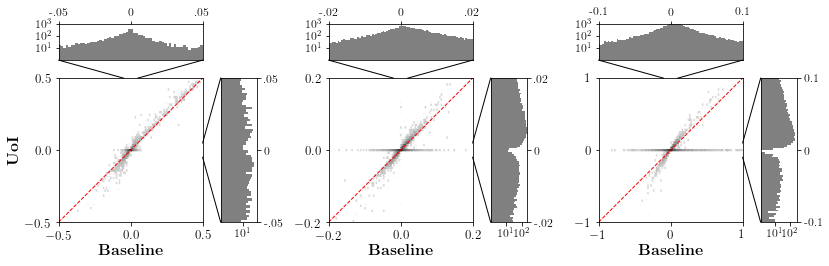

In [14]:
f_height = 3
f_width = 12
fig = plt.figure(figsize=(f_width, f_height))

# dimensions for each 2d and 1d histogram
hex_dim = 2.
hex_spacing = 1.75
top_spacing = 0.25
side_spacing = 0.25
hist_height = 0.50

# bounds for each 2d and 1d histogram
ac_2d_bound = 0.5
ac_1d_bound = 0.05
v1_2d_bound = 0.2
v1_1d_bound = 0.02
m1_2d_bound = 1.
m1_1d_bound = 0.1

# concatenate bounds
bounds_2d = [ac_2d_bound, v1_2d_bound, m1_2d_bound]
bounds_1d = [ac_1d_bound, v1_1d_bound, m1_1d_bound]

# use bounds for histogram bins
bins_ac = np.linspace(-ac_1d_bound, ac_1d_bound, 61)
bins_v1 = np.linspace(-v1_1d_bound, v1_1d_bound, 81)
bins_m1 = np.linspace(-m1_1d_bound, m1_1d_bound, 81)

# auditory cortex
# 2d histogram
ac_x = 0.
ac_y = 0.
ac_w = hex_dim / f_width
ac_h = hex_dim / f_height
ac_2d = fig.add_axes([ac_x, ac_y, ac_w, ac_h])
ac_2d.hexbin(
    ac_baseline_ccs_all,
    ac_uoi_ccs_all,
    bins='log',
    extent=[-ac_2d_bound, ac_2d_bound, -ac_2d_bound, ac_2d_bound],
    cmap=alt_cmap)
tighten_scatter_plot(ac_2d, bounds=[-ac_2d_bound, ac_2d_bound],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})
# baseline marginal histogram
ac_top_x = ac_x
ac_top_y = ac_y + ac_h + (top_spacing / f_height)
ac_top_w = ac_w
ac_top_h = hist_height / f_height
ac_top = fig.add_axes([ac_top_x, ac_top_y, ac_top_w, ac_top_h])
ac_top.hist(ac_baseline_nz_ccs,
            color='gray',
            bins=bins_ac)
ac_top.set_yscale('log', nonposy='clip')

# uoi marginal histogram
ac_side_x = ac_x + ac_w + (side_spacing / f_width)
ac_side_y = ac_y
ac_side_w = hist_height / f_width
ac_side_h = ac_h
ac_side = fig.add_axes([ac_side_x, ac_side_y, ac_side_w, ac_side_h])
ac_side.hist(ac_uoi_nz_ccs,
             color='gray',
             bins=bins_ac,
             orientation='horizontal')
ac_side.set_xscale('log', nonposx='clip')

# v1 histograms
# 2d histogram
v1_x = ac_x + ac_w + (hex_spacing / f_width)
v1_y = ac_y
v1_w = hex_dim / f_width
v1_h = hex_dim / f_height
v1_2d = fig.add_axes([v1_x, v1_y, v1_w, v1_h])
v1_2d.hexbin(
    v1_baseline_ccs_all,
    v1_uoi_ccs_all,
    bins='log',
    cmap=alt_cmap,
    extent=[-v1_2d_bound, v1_2d_bound, -v1_2d_bound, v1_2d_bound])
tighten_scatter_plot(v1_2d, bounds=[-v1_2d_bound, v1_2d_bound],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})
# baseline marginal histogram
v1_top_x = v1_x
v1_top_y = v1_y + v1_h + (top_spacing / f_height)
v1_top_w = v1_w
v1_top_h = hist_height / f_height
v1_top = fig.add_axes([v1_top_x, v1_top_y, v1_top_w, v1_top_h])
v1_top.hist(v1_baseline_nz_ccs,
            color='gray',
            bins=bins_v1)
v1_top.set_yscale('log', nonposy='clip')
# uoi marginal histogram
v1_side_x = v1_x + v1_w + (side_spacing / f_width)
v1_side_y = v1_y
v1_side_w = hist_height / f_width
v1_side_h = v1_h
v1_side = fig.add_axes([v1_side_x, v1_side_y, v1_side_w, v1_side_h])
v1_side.hist(v1_uoi_nz_ccs,
             color='gray',
             bins=bins_v1,
             orientation='horizontal')
v1_side.set_xscale('log', nonposx='clip')

# m1 histograms
# 2d histogram
m1_x = v1_x + v1_w + (hex_spacing / f_width)
m1_y = ac_y
m1_w = hex_dim / f_width
m1_h = hex_dim / f_height
m1_2d = fig.add_axes([m1_x, m1_y, m1_w, m1_h])
m1_2d.hexbin(
    m1_baseline_ccs_all,
    m1_uoi_ccs_all,
    bins='log',
    extent=[-m1_2d_bound, m1_2d_bound, -m1_2d_bound, m1_2d_bound],
    cmap=alt_cmap,)
tighten_scatter_plot(m1_2d, bounds=[-m1_2d_bound, m1_2d_bound],
                     line_kwargs={'color': 'red',
                                  'linestyle': '--',
                                  'zorder': 2,
                                  'linewidth': 1})
# baseline marginal histogram
m1_top_x = m1_x
m1_top_y = m1_y + m1_h + (top_spacing / f_height)
m1_top_w = m1_w
m1_top_h = hist_height / f_height
m1_top = fig.add_axes([m1_top_x, m1_top_y, m1_top_w, m1_top_h])
m1_top.hist(m1_baseline_nz_ccs,
            color='gray',
            bins=bins_m1)
m1_top.set_yscale('log', nonposy='clip')
# uoi marginal histogram
m1_side_x = m1_x + m1_w + (side_spacing / f_width)
m1_side_y = m1_y
m1_side_w = hist_height / f_width
m1_side_h = m1_h
m1_side = fig.add_axes([m1_side_x, m1_side_y, m1_side_w, m1_side_h])
m1_side.hist(m1_uoi_nz_ccs,
             color='gray',
             bins=bins_m1,
             orientation='horizontal')
m1_side.set_xscale('log', nonposx='clip')

# concatenate figures in lists
bases = [ac_2d, v1_2d, m1_2d]
tops = [ac_top, v1_top, m1_top]
sides = [ac_side, v1_side, m1_side]


# set main plot ticks and tick properties
for base, top, side, bound_2d, bound_1d in zip(bases, tops, sides, bounds_2d, bounds_1d):
    # base plot limits and ticks
    base.set_xlim([-bound_2d, bound_2d])
    base.set_ylim(base.get_xlim())
    base.set_xticks([-bound_2d, 0, bound_2d])
    base.set_yticks(base.get_xticks())
    base.tick_params(labelsize=13)
    # top plot limits and ticks
    top.set_xlim([-bound_1d, bound_1d])
    top.set_ylim([1, 1e3])
    top.set_xticks([-bound_1d, 0, bound_1d])
    top.set_yticks([10, 100, 1000])
    top.xaxis.tick_top() # put x-axis on top
    top.tick_params(labelsize=12)
    # side plot limits and ticks
    side.set_ylim([-bound_1d, bound_1d])
    side.set_yticks([-bound_1d, 0, bound_1d])
    side.yaxis.tick_right()
    
# additional customizations: x-tick labels for base plots 
ac_top.set_xticklabels(['-.05', '0', '.05'])
v1_top.set_xticklabels(['-.02', '0', '.02'])
m1_top.set_xticklabels(['-0.1', '0', '0.1'])

# additional customizations: side plot x-axis and ticklabels
ac_side.set_xlim([1, 40])
ac_side.set_xticks([10])
ac_side.set_yticklabels(['-.05', '0', '.05'])
ac_side.tick_params(labelsize=12)

v1_side.set_xlim([1, 2e2])
v1_side.set_xticks([10, 100])
v1_side.set_yticklabels(['-.02', '0', '.02'])
v1_side.tick_params(labelsize=12)

m1_side.set_xlim([1, 300])
m1_side.set_xticks([10, 100])
m1_side.set_yticklabels(['-0.1', '0', '0.1'])
m1_side.tick_params(labelsize=12)

# add lines indicating zoom in
inv = fig.transFigure.inverted()

# iterate over each brain region, adding top and side lines for each one
for base, top, side, bound_2d, bound_1d in zip(bases, tops, sides, bounds_2d, bounds_1d):
    # use transforms to get the figure coordinates for top lines
    top_line1_point1 = inv.transform(base.transData.transform((-bound_1d, bound_2d)))
    top_line1_point2 = inv.transform(top.transAxes.transform((0, 0)))
    top_line2_point1 = inv.transform(base.transData.transform((bound_1d, bound_2d)))
    top_line2_point2 = inv.transform(top.transAxes.transform((1, 0)))

    # create top lines
    top_line1 = matplotlib.lines.Line2D(
        [top_line1_point1[0], top_line1_point2[0]],
        [top_line1_point1[1], top_line1_point2[1]],
        transform=fig.transFigure,
        color='k',
        linewidth=1,
        figure=fig)

    top_line2 = matplotlib.lines.Line2D(
        [top_line2_point1[0], top_line2_point2[0]],
        [top_line2_point1[1], top_line2_point2[1]],
        transform=fig.transFigure,
        color='k',
        linewidth=1,
        figure=fig)
    
    # use transforms to get the figure coordinates for side lines
    side_line1_point1 = inv.transform(base.transData.transform((bound_2d, bound_1d)))
    side_line1_point2 = inv.transform(side.transAxes.transform((0, 1)))
    side_line2_point1 = inv.transform(base.transData.transform((bound_2d, -bound_1d)))
    side_line2_point2 = inv.transform(side.transAxes.transform((0, 0)))

    # create side lines
    side_line1 = matplotlib.lines.Line2D(
        [side_line1_point1[0], side_line1_point2[0]],
        [side_line1_point1[1], side_line1_point2[1]],
        transform=fig.transFigure,
        color='k',
        linewidth=1,
        figure=fig)

    side_line2 = matplotlib.lines.Line2D(
        [side_line2_point1[0], side_line2_point2[0]],
        [side_line2_point1[1], side_line2_point2[1]],
        transform=fig.transFigure,
        color='k',
        linewidth=1,
        figure=fig)

    # add all lines to figure
    fig.lines.extend([top_line1, top_line2, side_line1, side_line2])

ac_2d.set_ylabel(r'\textbf{UoI}', fontsize=16)
ac_2d.set_xlabel(r'\textbf{Baseline}', fontsize=16)
v1_2d.set_xlabel(r'\textbf{Baseline}', fontsize=16)
m1_2d.set_xlabel(r'\textbf{Baseline}', fontsize=16)
# plt.savefig('figure4b.pdf', bbox_inches='tight')